In [260]:
import numpy as np
import matplotlib.pyplot as plt

"""
INTEGRANTES
  Etienne Bellenger Herrera   17619315-8
  Camilo Acevedo Álvarez      19982274-8
  Lucas Villavicencio Abarca  19774486-3
  Nicolle Ojeda Ortega        19911712-2
"""

'\nINTEGRANTES\n  Etienne Bellenger Herrera   17619315-8\n  Camilo Acevedo Álvarez      19982274-8\n  Lucas Villavicencio Abarca  19774486-3\n  Nicolle Ojeda Ortega        19911712-2\n'

In [261]:
def factible(res,mres): # define si el espacio es factible(1) o vacio (0)
  # si las pendientes son positivas y negativas se evalua

  negativo = np.zeros((res))          #se inicializan los vectores con 0
  interseccion = np.zeros((res))
  
  #Almacena si la pendiente es negativa y la interseccion del eje x de cada restriccion
  for i in range(res):                
    interseccion[i] = mres[i,2]/mres[i,0]
    pendiente = mres[i,0]/mres[i,1]
    if (pendiente < 0):
    	  negativo[i] = 1
    else:
        negativo[i] = 0

  #Se compara la interseccion de x para determinar si existe un espacio factible
  for i in range(res-1):
    for j in range( i+1 , res):
      if (negativo[i] < negativo[j]):
        if (interseccion[i] - interseccion[j] < 0):
          return 0
      elif (negativo[i] > negativo[j]):
        if (interseccion[i] - interseccion[j] > 0):
          return 0
          

  return 1

In [262]:
def estado(res,mres): # buscar si el espacio factible es abierto(1), cerrado(0)

  #busca las pendientes de la funcion
  negativo = np.zeros((res))
  for i in range(res):
    pendiente = mres[i,0]/mres[i,1]
    if (pendiente < 0):
    	  negativo[i] = 1
    else:
        negativo[i] = 0

  #determina si todas las pendientes son negativo el espacio sera cerrado
  i = 0
  while (negativo[i]==1):
    i = i+1
    if (i == res):
      return 0

  #determina si todas las pendientes son positivas el espacio sera abierto
  i = 0
  while (negativo[i]==0):
    i = i+1
    if (i == res):
      return 1

  #si el espacio es factible y las pendientes son negativas y positivas, el espacio sera cerrado
  if (factible(res,mres)==1):
    return 0

  return 1
  



      

In [263]:
def difs(res,a,x): #Busqueda de fila pivote

    dif = np.zeros((res))       

    #Se buscan todos los rhs divididos en los valores de la columna x1 o x2
    for i in range(res):
        dif[i] = a[i+1,res+2]/a[i+1,x]

    #Se busca la posicion para pivotear con el simplex
    for i in range(res):
        if(dif[i]>0):
            aux = dif[i]
            posicion = i+1
            break
    
    for i in range(res):
        if(dif[i]>0 and dif[i]<aux):
            aux = dif[i]
            posicion = i+1
             
    return posicion

In [264]:
def graficar_nivel(rx):    
    fig = plt.figure(figsize=(6,5))
    left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
    ax = fig.add_axes([left, bottom, width, height])
    
    start, stop, n_values = 0, 30,2000

    # se definen las variables para recorrer el espacio desde 0 a 30
    x_vals = np.linspace(start, stop, n_values)
    y_vals = np.linspace(start, stop, n_values)
    x1_vals = np.linspace(start, stop, n_values)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = rx[0,0] * X + rx[0,1] * Y

    # Se grafican las rectas
    plt.title('Curva de nivel + Restricciones')
    color = ['GreenYellow', 'Olive', 'royalBlue']
    for i in range(res):
        plt.plot(x_vals, (rx[i+1,2]-rx[i+1,0] * x1_vals)/rx[i+1,1], color[i], label=f'R{i+1}')

    # Etiquetas
    plt.legend(bbox_to_anchor=(1.4, 1), loc=0, borderaxespad=0.)

    #Las curvas de nivel son asignadas
    cp = plt.contourf(X, Y, Z, cmap='Blues')
    plt.colorbar(cp)

    # Guardar graficos
    plt.savefig("graficos.png")
    plt.show()

In [265]:
def vertices(res,mres):
    points = np.zeros((res+1,2))
    save = np.zeros((res+1,2))
    aux = np.zeros((3))

    # se inicia la busqueda de los puntos donde x es 0 y donde y es 0
    for i in range(2):
        save[i,i] = mres[0,2]/mres[0,0]
        for f in range(res):
            if (mres[f,2]/mres[f,i]>0  and mres[f,2]/mres[f,i]<save[i,i]) or save[i,i]<0:
                    save[i,i] = mres[f,2]/mres[f,i]
    
    # se busca los puntos donde se intersectan las rectas
    for i in range(res-1):

        # Se buscan los vectores donde quede y igualado a una constante
        if(mres[i,0]<0 and mres[i+1,0]>0) or (mres[i,0]>0 and mres[i+1,0]<0):
            aux = np.add(mres[i],(np.divide(mres[i+1],mres[i+1,0])*abs(mres[i,0])))
        else:
            aux = np.add(mres[i],-(np.divide(mres[i+1],mres[i+1,0])*mres[i,0]))
            
        # se despeja y para encontrar su valor
        save[i+2,i] = aux[2]/aux[1]
        # se utiliza el valor de y para encontrar el valor de x
        save[i+2,1-i] = (mres[i+1,2]-(save[i+2,i]*mres[i+1,i]))/mres[i+1,1-i]
    
    return save

In [266]:
def simple(x1,x2,res,mres):

    if (factible(res,mres)==1):
      print('\nEl espacio es: distinto de vacio')
    else:
      print('\nEl espacio es: vacio')

    if (estado(res,mres)==1):
      print('\nEl espacio es: abierto')
    else:
      print('\nEl espacio es: cerrado')

    a = np.zeros((res+1,res+3))
    
    #Se inicializa la matriz a con los valores de la funcion objetivo y las restricciones
    a[0,0] = x1
    a[0,1] = x2
    
    rx = np.zeros((res+1,3))
    
    for i in range(res):
        a[i+1,0] = mres[i,0]
        a[i+1,1] = mres[i,1]
        a[i+1,i+2] = 1
        a[i+1,res+2] = mres[i,2]
        
     #Se rellena el rx para con los valores de las restricciones

    for i in range(res+1):
        for k in range(2):
            rx[i,k] = a[i,k]
        rx[i,2] = a[i,res+2]
        
    col=0

    # se inicia el proceso del simplex
    while(1):
        
        #se busca el pivote
        dif = difs(res,a,col)
        
        #en caso de iterar mas de 2 veces empezara buscando las variables de holgura
        if(col >= 2):
            for i in range(res+2):
                if a[0,i]<0:
                    col = i
                    break
            for i in range(res):
                if(a[i+1,0]!=1)and(a[i+1,0]!=1):
                    dif=i 

        # el vector pivote se iguala el valor a 1          
        a[dif]= np.divide(a[dif],a[dif,col])
        if  a[dif,col]<0:
            a[dif] = a[dif]*-1
            
        # se deja el resto de los valores de la columna en 0
        for i in range(res+1):
            if dif!=i:
                a[i] = np.add(a[i],-(a[dif]*a[i,col]))
                    
        # en caso de estar en la primera iteracion continua con el valor de y, definido como x2 
        if col < 2:
            col = col+1
        
        # termina el proceso de busqueda del optimo, ya que el vector de la funcion objetvio estan todos los valores positivos
        if(a[0,0]>=0)and(a[0,1]>=0)and(a[0,2]>=0)and(a[0,3]>=0)and(a[0,4]>=0):
            graficar_nivel(rx)
            return a[0,res+2]



Ingrese la primera variable de decisión :4
-------------------------------------
Ingrese la segunda variable de decisión :6
Ingrese el numero de restricciones (1 a 3):3
-------------------------------------
Ingrese variable de restriccion :-1
-------------------------------------
Ingrese variable de restriccion :1
Ingrese resultado de restriccion :11
-------------------------------------
Ingrese variable de restriccion :1
-------------------------------------
Ingrese variable de restriccion :1
Ingrese resultado de restriccion :27
-------------------------------------
Ingrese variable de restriccion :2
-------------------------------------
Ingrese variable de restriccion :5
Ingrese resultado de restriccion :90

El espacio es: distinto de vacio

El espacio es: cerrado


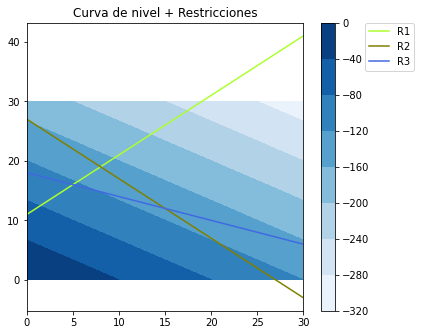

Solución Optima: 132.0


In [267]:
#Ingreso de los datos
x1 = -1 * int (input('Ingrese la primera variable de decisión :')) # se solicitan los coeficientes de las variables de decisión
print('-------------------------------------')
x2 = -1 * int (input('Ingrese la segunda variable de decisión :'))
res=0
res = int (input('Ingrese el numero de restricciones (1 a 3):')) # se definen las cantidades de restriccioens
while(res<1 or res>3):
  print('-------------------------------------')
  res = int (input('Ingrese el numero de restricciones nuevamente (1 a 3):')) 
while(res<=0):
  print('-------------------------------------')
  res = int (input('Ingrese un numero de restricciones entero y mayor a 0 :'))

mres = np.zeros((res,3))

for i in range((res)):
  for j in range(2):
    print('-------------------------------------')
    mres[i,j] =int (input('Ingrese variable de restriccion :')) # se ingresan los coeficientes de las variables de restriccion
  mres[i,2] =int (input('Ingrese resultado de restriccion :'))   



if estado(res,mres)==1 or factible(res,mres) !=1: 
    print("No existe una solución optima")
else:
    print("Solución Optima:",simple(x1,x2,res,mres))
    